In [1]:
%matplotlib inline
import sys
import os
import numpy
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# MAKE Sure that google_refexp_py_lib is in your python libary search path
# before you run API in this toolbox. You can use something as follows:
sys.path.append('./google_refexp_py_lib')
from refexp_eval import RefexpEvalComprehension
from refexp_eval import RefexpEvalGeneration
from common_utils import draw_bbox

# Set coco_data_path and Google Refexp dataset validation set path
coco_data_path = './external/coco/annotations/instances_train2014.json'
refexp_dataset_path = './google_refexp_dataset_release/google_refexp_val_201511_coco_aligned.json'

## Evaluation Demo for the Comprehension Task

In [2]:
# Load Google Refexp dataset and MS COCO dataset (takes some time)
eval_compreh = RefexpEvalComprehension(refexp_dataset_path, coco_data_path)

Loading Google Refexp dataset file for the comprehension task.
loading annotations into memory...
Done (t=14.51s)
creating index...
index created!
Dataset loaded.


In [3]:
# We evalute a sample comprehension task results generated by
# a naive method which outputs the groundtruth bounding boxes
# in the coco image with a random order.
pred_results_path = ('./evaluation/sample_results/'
                     'sample_results_comprehension.json')

(prec, eval_results) = eval_compreh.evaluate(pred_results_path)

Loading predicted result file for the comprehension task.
The average prec@1 score is 0.175


5240 top 1 predicted bounding boxes have IoU with GT less than 0.1

The Referring expression input to the model is:
  couch in living room


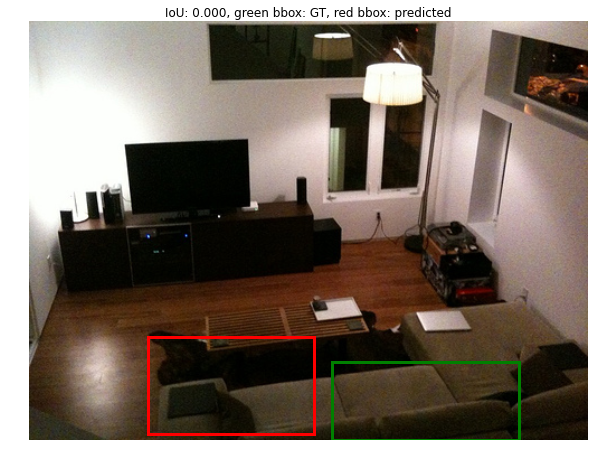

In [4]:
# Visualize the cases where your method performs bad/good. E.g.:
bad_results = [res for res in eval_results if res['best_iou'] < 0.05]
print ('%d top 1 predicted bounding boxes have IoU '
       'with GT less than 0.1' % len(bad_results))
print

# Random pick one and visualuze it
coco_image_dir = './external/coco/images/train2014'
bad_sample = bad_results[numpy.random.randint(0,len(bad_results))]
eval_compreh.visualize_top_predicted_bbox(bad_sample, coco_image_dir)

# Evaluation Demo for the Generation Task

In [5]:
# Load Google Refexp dataset and MS COCO dataset (takes some time)
eval_gen = RefexpEvalGeneration(refexp_dataset_path, coco_data_path)

Loading Google Refexp dataset file for the generation task.
loading annotations into memory...
Done (t=19.07s)
creating index...
index created!
Dataset loaded.


In [8]:
# We evalute a sample generation task results generated by
# a naive method which outputs groundtruth object category name.
pred_results_path = ('./evaluation/sample_results/'
                     'sample_results_generation.json')
# Input the public url that you will upload the images in your 
# 'local_image_dir'. Mturkers should be avaible to view the images
# under this public url. E.g. http://your_public_url/coco_10058.jpg
# You can consider using Amazon E3 or any other puclic online file
# systems.
public_image_url_prefix = 'http://your_public_url/'
# You should upload these images to your public image server
local_image_dir = './cache_evaluation/AMT_images/sample_generation_val1000'
# You should start your AMT project by uploading this csv file
if not os.path.isdir('./cache_evaluation/AMT_csv/'):
    os.makedirs('./cache_evaluation/AMT_csv/')
AMT_csv_path = './cache_evaluation/AMT_csv/sample_generation_val1000.csv'
coco_image_dir = './external/coco/images/train2014'

# It takes time to generate images
eval_gen.generate_AMT_csv_and_images(pred_results_path,
                                     public_image_url_prefix,
                                     AMT_csv_path,
                                     coco_image_dir=coco_image_dir,
                                     local_image_dir=local_image_dir
                                    )

Loading predicted result file for the generation task.
Start to generate csv file to upload to AMT
Finished to generate the csv file
Input local image directory does not exist, create it
Start to generate images for AMT in local hard disk
Images generated in local hard disk, please make sure to make them publicly available online.


In [ ]:
# When finish the AMT job, download the csv result file and
# use the following API to summarize the results
eval_gen.parse_AMT_results('yout_downloaded_csv_path')